In [29]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

import statsmodels.stats.api as sms
import statsmodels.formula.api as sm
import scipy.stats as stats
from statsmodels.sandbox.stats.multicomp import multipletests 
from statsmodels.stats.diagnostic import het_breuschpagan

from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

Этот набор данных включает информацию о 40 видах млекопитающих. Полученные данные были использованы для анализа связи между конституциональными и экологическими факторами и сном у млекопитающих. Были зарегистрированы две качественно разные переменные сна (сновидение и отсутствие сновидений). Были оценены конституциональные переменные, такие как продолжительность жизни, масса тела, масса мозга и время беременности. Экологические переменные, такие как серьезность хищничества, безопасность спального места и общая опасность, были получены на основе изучения в литературных источниках.

Allison T., Cicchetti D. V. Sleep in mammals: ecological and constitutional correlates //Science. – 1976. – Т. 194. – №. 4266. – С. 732-734.

In [47]:
df = pd.read_csv('SleepInMammals.csv')
data = df.drop(['non_dreaming', 'dreaming'], axis=1)
df.head()

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big brown bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


In [3]:
all_feat = ['total_sleep', 'body_wt', 'brain_wt', 'life_span', 'gestation', 'predation', 'exposure', 'danger']
cat_feat = ['predation', 'exposure', 'danger']
num_feat = ['body_wt', 'brain_wt', 'life_span', 'gestation']
target = 'total_sleep'

| Имя столбца                | Значение                     |
|:--------------------------:|:----------------------------:|
| Species of animal          | Виды животных                |
| Body Weight (kg)           | Масса тела (кг)              | 
| Brain Weight (g)           | Вес мозга (г)                | 
| Slow wave sleep (hrs/day)  | Медленная фаза сна (ч/день)  | 
| Paradoxical sleep (hrs/day)| Быстрая фаза сна (ч/день)    |
| Total sleep (hrs/day)      | Общий сон (часы/день)        |
| Maximum life span (years)  | Длительность жизни (лет)     |
| Gestation time (days)      | Срок беременности (дни)      |
| Predation index            | Индекс хищничества           |
| Sleep exposure index       | Индекс экспозиции во сне     |
| Overall danger index       | Общий индекс опасности       |

Дополнительные пояснения по переменным:
1. Индекс хищничества - показатель вероятности того, что млекопитающее станет добычей. 1 = наименьшая вероятность стать добычей. 5 = скорее всего, на вас будут охотиться.
2. Индекс экспозиции во сне - показатель того, насколько подвержено опасности млекопитающее во время сна. 1 = наименее подвергается воздействию (например, спит в хорошо защищенном логове). 5 = наиболее уязвимые
3. Общий индекс опасности - показатель того, с какой опасностью млекопитающие сталкиваются со стороны других животных. Этот индекс основан на хищничестве и воздействии. 1 = наименьшая опасность от других животных. 5 = наибольшая опасность от других животных.

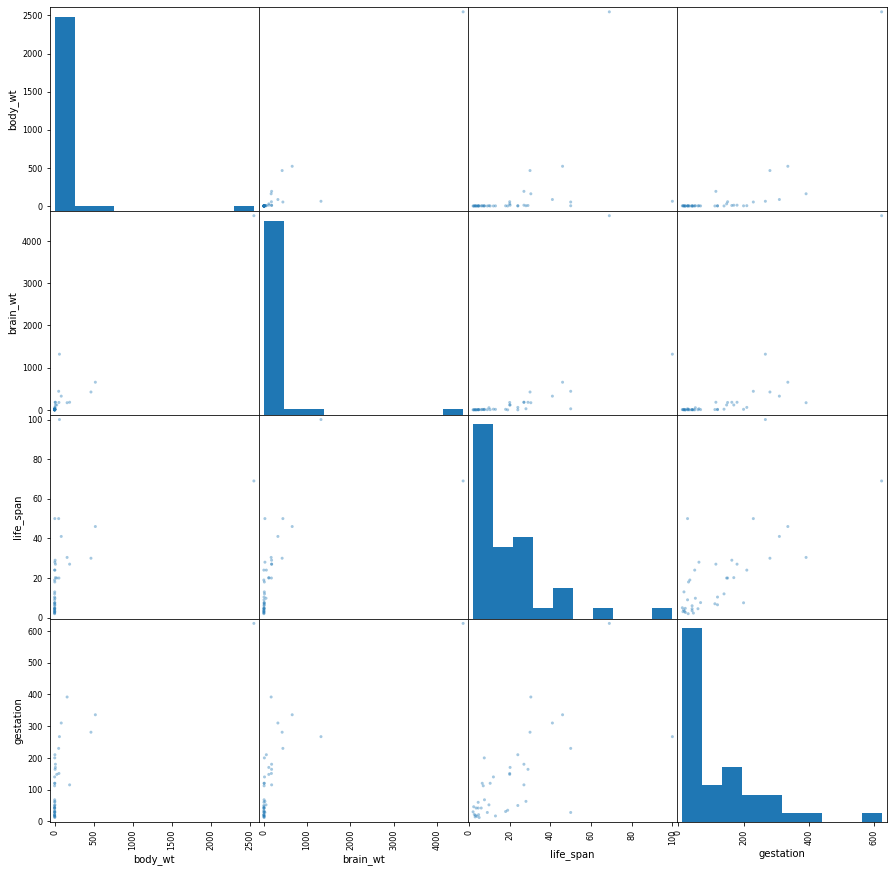

In [5]:
pd.plotting.scatter_matrix(data[num_feat], alpha=0.4, 
                                 figsize=(15, 15), diagonal='hist')
plt.show()

In [6]:
m1 = sm.ols('total_sleep ~  brain_wt + body_wt + life_span + gestation + C(predation) + C(exposure) + C(danger)', 
             data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sleep   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     3.947
Date:                Mon, 21 Feb 2022   Prob (F-statistic):            0.00144
Time:                        22:16:35   Log-Likelihood:                -91.785
No. Observations:                  40   AIC:                             217.6
Df Residuals:                      23   BIC:                             246.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            15.0026      1.71

In [7]:
print('Breusch-Pagan test: p=%f' % het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.258357


In [45]:
m2 = sm.ols('np.log(total_sleep) ~ np.log(body_wt)+C(predation)+C(danger) + np.log(body_wt)/np.log(life_span)+ np.log(life_span)/np.log(gestation)+np.log(gestation)', 
             data=data)
fitted_2 = m2.fit()
print(fitted_2.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(total_sleep)   R-squared:                       0.875
Model:                             OLS   Adj. R-squared:                  0.812
Method:                  Least Squares   F-statistic:                     13.95
Date:                 Mon, 21 Feb 2022   Prob (F-statistic):           1.48e-08
Time:                         22:33:16   Log-Likelihood:                 13.128
No. Observations:                   40   AIC:                             1.743
Df Residuals:                       26   BIC:                             25.39
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [10]:
print('Breusch-Pagan test: p=%f' % het_breuschpagan(fitted_2.resid, fitted_2.model.exog)[1])

Breusch-Pagan test: p=0.313939


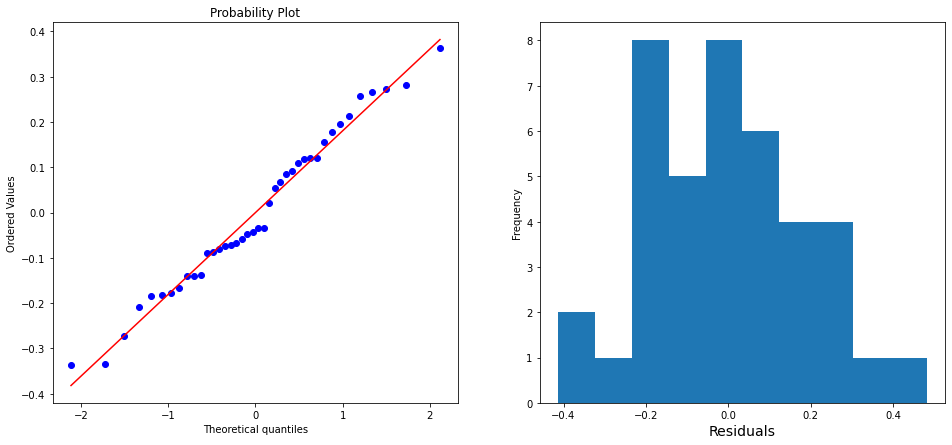

In [18]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sc.stats.probplot(fitted_2.resid, dist="norm", plot=plt)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

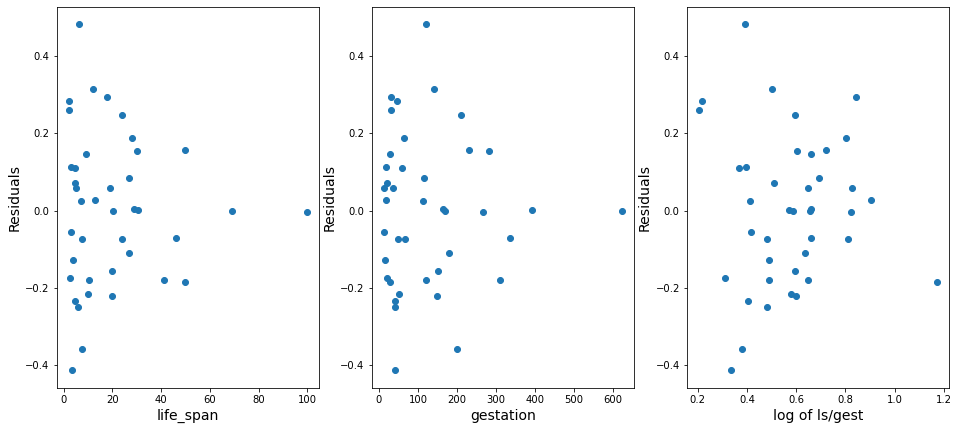

In [44]:
plt.figure(figsize=(16,7))
plt.subplot(131)
plt.scatter(data['life_span'],fitted.resid)
plt.xlabel('life_span', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(132)
plt.scatter(data['gestation'],fitted.resid)
plt.xlabel('gestation', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(133)
plt.scatter(np.log(data['life_span'])/np.log(data['gestation']),fitted.resid)
plt.xlabel('log of ls/gest', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

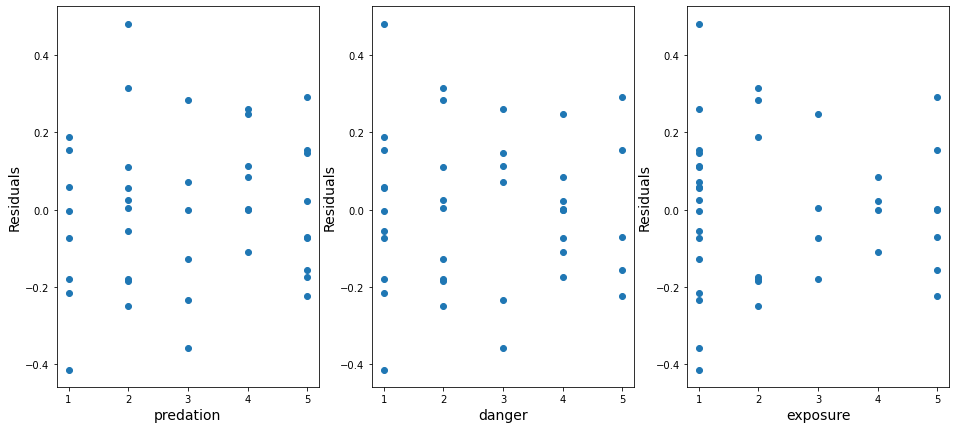

In [20]:
plt.figure(figsize=(16,7))
plt.subplot(131)
plt.scatter(data['predation'],fitted.resid)
plt.xlabel('predation', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(132)
plt.scatter(data['danger'],fitted.resid)
plt.xlabel('danger', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(133)
plt.scatter(data['exposure'],fitted.resid)
plt.xlabel('exposure', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

### Полный датасет (с пропусками)

In [25]:
data_all = pd.read_csv('mammals.csv')
data_all.drop(['non_dreaming', 'dreaming'], axis=1, inplace=True)

In [34]:
print(data_all.shape)
data_all.head()

(62, 9)


,species,body_wt,brain_wt,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.000,5712.0,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,3.9,69.0,624.0,3,5,4


In [30]:
X = data_all.copy()

imputer = KNNImputer(n_neighbors=1)
X[all_feat] = imputer.fit_transform(X[all_feat])

In [32]:
X.isnull().any()

species        False
body_wt        False
brain_wt       False
total_sleep    False
life_span      False
gestation      False
predation      False
exposure       False
danger         False
dtype: bool

In [119]:
m_all = sm.ols('np.log(total_sleep) ~ np.log(body_wt)+C(predation)+C(danger) + np.log(body_wt)/np.log(life_span)+ np.log(life_span)/np.log(gestation)+np.log(gestation)', 
             data=X)
fitted_all = m_all.fit()
print(fitted_all.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(total_sleep)   R-squared:                       0.816
Model:                             OLS   Adj. R-squared:                  0.766
Method:                  Least Squares   F-statistic:                     16.36
Date:                 Mon, 21 Feb 2022   Prob (F-statistic):           2.13e-13
Time:                         14:24:22   Log-Likelihood:                 2.7373
No. Observations:                   62   AIC:                             22.53
Df Residuals:                       48   BIC:                             52.31
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------